In [11]:
import sys
sys.path.append('/home/zhw272/programming/pipeline_utility')
from utilities.brain_specimens.get_prep_list import get_prep_list_excluding_DK52
from utilities.sqlcontroller import SqlController
from utilities.alignment.align_point_sets import align_point_sets
from utilities.brain_specimens.get_brain_COM import get_center_of_mass,get_atlas_center_of_mass
import numpy as np

In [2]:
prep_list_excluding_DK52 = get_prep_list_excluding_DK52()

In [24]:
prepi = prep_list_excluding_DK52[0]
controller = SqlController('DK52')
coms = controller.get_centers_dict("DK39")
atlas_coms = controller.get_centers_dict("Atlas", person_id=1, input_type_id=4)

In [27]:
com1,com2 = get_common_point_set(coms,atlas_coms)

In [32]:
plot_two_point_set(com1,com2)

[38803.4 22355.4   329. ] [532.02  620.015 209.   ]
[39468.5 23531.5   203. ] [532.02  620.015  92.   ]
[36351.5 23980.7   236. ] [430.593 620.165 126.   ]
[36074.1 23526.    292. ] [430.593 620.165 175.   ]
[36316.2 18831.1   324. ] [454.531 502.58  219.   ]
[37069.7 20100.4   178. ] [454.531 502.58   82.   ]
[32740.3 22805.6   299. ] [336.669 591.545 182.   ]
[32964.7 23199.    233. ] [336.669 591.545 119.   ]
[33423.7 15830.6   247. ] [365.917 393.315 157.   ]
[33190.2 15847.4   233. ] [365.917 393.315 144.   ]
[38359.  19339.7   272. ] [515.926 512.031 169.   ]
[43814.6 18640.    273. ] [712.811 563.231 165.   ]
[41901.3 22575.7   198. ] [712.811 563.231 136.   ]
[37587. 16406.   288.] [499.548 446.989 192.   ]
[38569.1 17311.8   203. ] [499.548 446.989 109.   ]
[38561.3 19710.7   235. ] [515.926 512.031 132.   ]
[40112.3 18516.9   135. ] [574.29  467.655  57.   ]
[38270.5 16977.2   373. ] [574.29  467.655 244.   ]


In [35]:
point1 = com1[0]
point2 = com2[0]
point1,point2

(array([38803.4, 22355.4,   329. ]), array([532.02 , 620.015, 209.   ]))

In [40]:
((point2+np.array([500,500,150]))*np.array([1,1,2]))

array([1032.02 , 1120.015,  718.   ])

In [42]:
point2/np.array([0.325,0.325,20])

array([1636.98461538, 1907.73846154,   10.45      ])

In [38]:
point1/((point2+np.array([500,500,150]))/np.array([1,1,2]))

array([37.59946513, 19.95991125,  1.83286908])

((18, 3), (18, 3))


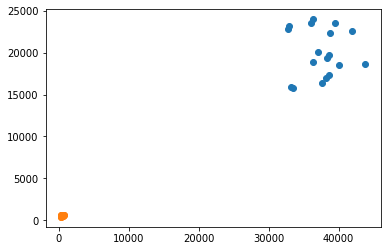

In [26]:
scatter_two_com_dict(coms,atlas_coms)

In [5]:
coms = get_center_of_mass("DK41")
atlas_coms = get_atlas_center_of_mass()

In [21]:
com1,com2 = get_common_point_set(atlas_coms,coms)
rotation,translation = align_point_sets(com1.T,com2.T)

((20, 3), (20, 3))


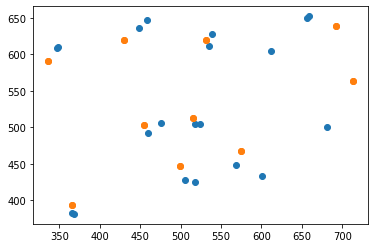

In [17]:
scatter_two_com_dict(coms,atlas_coms)

In [35]:
from utilities.model.center_of_mass import CenterOfMass
from sql_setup import session
def get_coordinate_from_query(query_results):
    coordinates = []
    for entry in query_results:
        coordinates.append([entry.x,entry.y,entry.section])
    return np.array(coordinates)

def atlas_com_type1():
    brain = 'Atlas'
    person_id = 1
    input_type_id = 4
    query_results = session.query(CenterOfMass)\
            .filter(CenterOfMass.active.is_(True))\
            .filter(CenterOfMass.prep_id == brain)\
            .filter(CenterOfMass.person_id == person_id)\
            .filter(CenterOfMass.input_type_id == input_type_id)\
            .all()
    coordinates = get_coordinate_from_query(query_results)
    return coordinates
com1 = atlas_com_type1()

In [36]:
def atlas_com_type2():
    brain = 'Atlas'
    person_id = 16
    input_type_id = 1
    query_results = session.query(CenterOfMass)\
            .filter(CenterOfMass.active.is_(True))\
            .filter(CenterOfMass.prep_id == brain)\
            .filter(CenterOfMass.person_id == person_id)\
            .filter(CenterOfMass.input_type_id == input_type_id)\
            .all()
    coordinates = get_coordinate_from_query(query_results)
    return coordinates
com2 = atlas_com_type2() 

In [31]:
import matplotlib.pyplot as plt
def get_common_point_set(com1_dict,com2_dict):
    key1 = com1_dict.keys()
    key2 = com2_dict.keys()
    shared_keys = [keyi for keyi in key1 if keyi in key2]
    com1 = []
    com2 = []
    for key in shared_keys:
        com1.append(com1_dict[key])
        com2.append(com2_dict[key])
    com1 = np.array(com1)
    com2 = np.array(com2)
    return com1,com2

def plot_two_point_set(pointset1,pointset2):
    assert len(pointset1)==len(pointset2)
    for pointi in range(len(pointset1)):
        print(pointset1[pointi],pointset2[pointi])

def scatter_two_com_array(com1,com2):
    plt.scatter(com1[:,0],com1[:,1])
    plt.scatter(com2[:,0],com2[:,1])

def scatter_two_com_dict(com1_dict,com2_dict):
    com1,com2 = get_common_point_set(com1_dict,com2_dict)
    print((com1.shape,com2.shape))
    plt.scatter(com1[:,0],com1[:,1])
    plt.scatter(com2[:,0],com2[:,1])